In [2]:
import pickle
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pickle.load(open("df_concat.pickle","rb"))
len(df)

22708

In [4]:
df.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [43]:
word = pickle.load(open("bag_of_words_concat.pickle","rb"))
word.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


In [6]:
len(word)

39300

In [75]:
words = set()
for i,r in word.iterrows():
    w,sc,wc = r 
    if sc >= 5:
        words.add(w)
print(len(words))
words = list(words)

10318


In [107]:
no_word_songs = []
for i,r in df.iterrows():
    for w in words:
        if w in bags[i]:
            break
    else:
        no_word_songs.append(i)
print(len(no_word_songs))

47


In [108]:
for i in no_word_songs:
    print(df.loc[i])

song                                                      walk -- don't run
artist                                                         the ventures
genius_raw                                                   [Instrumental]
genius_bag                                                               []
az_lyrics_raw                                                          None
az_lyrics_bag                                                          None
lyrics_az_raw             <span style="color:#29013c; font-size:8px;">[L...
lyrics_az_bag                                                            []
GvAZL                                                                     0
GvLAZ                                                                     1
AZLvLAZ                                                                   0
genius_counter                                                           {}
az_lyrics_counter                                                        {}
lyrics_az_co

In [111]:
set(dict(df.loc[14890]["word_intersect_counter"]).keys())-set(words)

{'barbra', 'oo-oo', 'streisand', 'who-oo-oo', 'whooo-oo'}

In [106]:
df[df["artist"]=="duck sauce"]["word_intersect_counter"]
dict(df.loc[14890]["word_intersect_counter"])

{'oo-oo': 59.0,
 'streisand': 8.0,
 'who-oo-oo': 27.0,
 'whooo-oo': 33.0,
 'barbra': 8.0}

In [113]:
word[word["word"] == "barbara"]

,word,songcount,wordcount
9213,barbara,13,116


In [31]:
bags = [dict(dic) for dic in df['word_intersect_counter']]
tbl = np.zeros(shape=(len(df),len(words)))
for i,b in enumerate(bags):
    if i%1000 == 0:
        print("{}% there".format(i/len(df)*100))
    for j,w in enumerate(words):
        if w in b:
            tbl[i][j] = b[w]
        else:
            tbl[i][j] = 0.0
#sp_mat = pd.DataFrame(tbl,columns=["Song","Artist"]+words)
#len(sp_mat)
print("100% there")
tbl.shape

0.0% there
0.04403734366742998% there
0.08807468733485996% there
0.13211203100228994% there
0.17614937466971992% there
0.2201867183371499% there
0.2642240620045799% there
0.3082614056720099% there
0.35229874933943983% there
0.39633609300686984% there
0.4403734366742998% there
0.4844107803417298% there
0.5284481240091597% there
0.5724854676765897% there
0.6165228113440198% there
0.6605601550114497% there
0.7045974986788797% there
0.7486348423463097% there
0.7926721860137397% there
0.8367095296811696% there
0.8807468733485996% there
0.9247842170160296% there
0.9688215606834596% there


(22708, 17419)

[{'let': 2.0,
  'okay': 1.0,
  'say': 2.0,
  'on': 4.333333333333333,
  'harley': 1.0,
  'brrr': 1.0,
  'woo': 1.0,
  'cardi': 1.0,
  'greatest': 1.0,
  'these': 2.0,
  'big': 2.0,
  'and': 3.0,
  'bird': 1.0,
  'swerve': 1.0,
  'hangup': 1.0,
  'nut': 8.0,
  'night': 1.0,
  'a': 7.0,
  'that': 9.0,
  'enough': 20.0,
  'my': 5.333333333333333,
  'yeah': 8.666666666666666,
  'you': 24.0,
  'one': 3.0,
  'money': 1.0,
  'hey': 10.0,
  'uzi': 1.6666666666666667,
  'important': 1.0,
  'foreign': 1.0,
  'nice': 1.0,
  'stack': 1.0,
  'know': 1.6666666666666667,
  'enormou': 1.0,
  'morn': 1.0,
  'maury': 1.0,
  'have': 2.6666666666666665,
  'only': 1.0,
  'carti': 2.0,
  'cash': 1.0,
  'playboi': 1.0,
  'all': 4.0,
  'wet': 1.0,
  'diamond': 1.0,
  'swear': 2.0,
  'bad': 1.0,
  'dumb': 9.0,
  'ever': 1.0,
  'phone': 1.0,
  'ooh': 6.666666666666667,
  'knot': 1.0,
  'lamb': 1.0,
  'think': 2.0,
  'vert': 1.6666666666666667,
  'me': 5.666666666666667,
  'meet': 1.0,
  'it': 30.666666666666668

,Song,Artist,universo,martyr,wonderin,peel,'cisco,skeezer,monoxide,insta,...,mojito,flowin,discrimination,jeff,forbe,tidy,conservative,lifestyle,monastery,cubano
0,sauce it up,lil uzi vert,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,backroad song,granger smith,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,feelin' satisfied,boston,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,country man,luke bryan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,try,p!nk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
features = sp_mat.columns[2:]
x_a = sp_mat.loc[:,features].values
x_a = tbl
print(x_a.shape)

x_a = StandardScaler().fit_transform(x_a)

(22708, 17419)


In [33]:
pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(x_a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(tbl)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

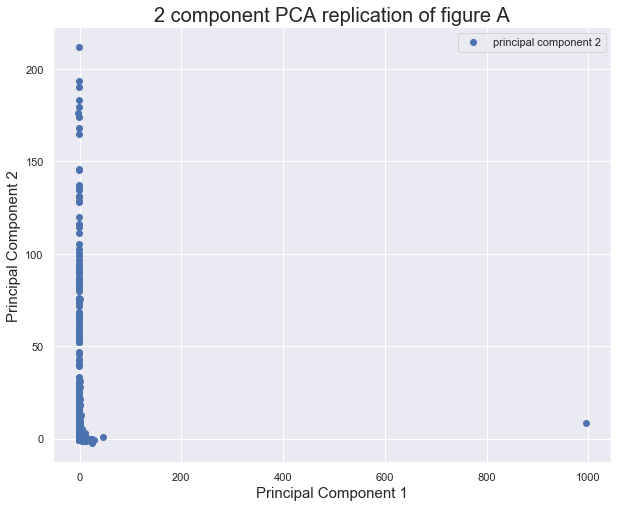

In [38]:
sns.set()

f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA replication of figure A', fontsize = 20)
ax.scatter(principalDf_a['principal component 1']
               , principalDf_a['principal component 2'])
ax.legend()
#ax.set_xlim([-2.5,1000])
#ax.set_ylim([-2.5,1000])
plt.show()

In [39]:
for i,r in principalDf_a.iterrows():
    if r["principal component 1"] > 400 or r["principal component 2"] > 400:
        print(r)

principal component 1    994.964539
principal component 2      8.278721
Name: 10332, dtype: float64


In [40]:
df.loc[10332]

song                                                         auld lang syne
artist                                                              kenny g
genius_raw                "The first words I spoke in the original phono...
genius_bag                [the, first, word, i, speak, in, the, original...
az_lyrics_raw                                                          None
az_lyrics_bag                                                          None
lyrics_az_raw             "The first words I spoke in the original phono...
lyrics_az_bag             [the, first, word, i, speak, in, the, original...
GvAZL                                                                     0
GvLAZ                                                              0.938005
AZLvLAZ                                                                   0
genius_counter            {'the': 108, 'first': 6, 'word': 2, 'i': 20, '...
az_lyrics_counter                                                        {}
lyrics_az_co